In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
import shutil
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

In [30]:
dataset_path = r"C:\Users\admin\Downloads\flower_photos_extracted"

In [32]:
license_folder = os.path.join(dataset_path, "LICENSE")
if os.path.exists(license_folder):
    shutil.rmtree(license_folder)
    print("License folder removed!")

In [38]:
original_dataset_path = r"C:\Users\admin\Downloads\flower_photos_extracted\flower_photos"
train_path = r"C:\Users\admin\Downloads\flower_photos_extracted\train"
val_path = r"C:\Users\admin\Downloads\flower_photos_extracted\val"
test_path = r"C:\Users\admin\Downloads\flower_photos_extracted\test"

In [79]:
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

categories = [cat for cat in os.listdir(original_dataset_path) if os.path.isdir(os.path.join(original_dataset_path, cat)) and cat.lower() != "license"]
test_split = 0.15 
val_split = 0.15   
train_split = 1 - (test_split + val_split)  

for category in categories:
    cat_path = os.path.join(original_dataset_path, category)
    images = os.listdir(cat_path)
    
    random.shuffle(images)
    
    test_size = int(len(images) * test_split)
    val_size = int(len(images) * val_split)

    test_images = images[:test_size]
    val_images = images[test_size:test_size + val_size]
    train_images = images[test_size + val_size:]

    for target_path, image_list in zip([train_path, val_path, test_path], [train_images, val_images, test_images]):
        os.makedirs(os.path.join(target_path, category), exist_ok=True)
        for img in image_list:
            shutil.copy(os.path.join(cat_path, img), os.path.join(target_path, category, img))

    print(f"{category}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

print("Dataset split completed!")


daisy: 445 train, 94 val, 94 test
dandelion: 630 train, 134 val, 134 test
roses: 449 train, 96 val, 96 test
sunflowers: 491 train, 104 val, 104 test
tulips: 561 train, 119 val, 119 test
Dataset split completed!


In [44]:
datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_data = datagen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical')
val_data = datagen.flow_from_directory(val_path, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_data = datagen.flow_from_directory(test_path, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False)
print("Class Labels:", train_data.class_indices)

Found 3343 images belonging to 5 classes.
Found 1012 images belonging to 5 classes.
Found 1002 images belonging to 5 classes.
Class Labels: {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [52]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,613 (6.50 MB)

 Trainable params: 1,704,613 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 647ms/step - accuracy: 0.3402 - loss: 1.4542 - val_accuracy: 0.5662 - val_loss: 1.0625
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 241ms/step - accuracy: 0.5312 - loss: 1.1135 - val_accuracy: 0.6047 - val_loss: 0.9398
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.6393 - loss: 0.9253 - val_accuracy: 0.6700 - val_loss: 0.8410
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.6746 - loss: 0.8711 - val_accuracy: 0.6966 - val_loss: 0.7755
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 263ms/step - accuracy: 0.7043 - loss: 0.7543 - val_accuracy: 0.7223 - val_loss: 0.6513
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 269ms/step - accuracy: 0.7427 - loss: 0.6704 - val_accuracy: 0.7836 - val_loss: 0.5837
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.7912 - loss: 0.5643 - val_accuracy: 0.8300 - val_loss: 0.4904
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.8209 - loss: 0

In [58]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.8858 - loss: 0.3575
Test Accuracy: 87.72%


In [69]:
model.save('flower_classification_model.h5')

In [71]:
from tensorflow.keras.models import load_model

model = load_model("flower_classification_model.h5")

class_labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def preprocess_image_cv2(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

new_img_path = r"C:\Users\admin\OneDrive\Pictures\download (1).jpeg"

processed_img = preprocess_image_cv2(new_img_path)
predictions = model.predict(processed_img)

predicted_class = class_labels[np.argmax(predictions)]
confidence = np.max(predictions)

print(f"Predicted Flower: {predicted_class} ({confidence * 100:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Flower: roses (82.90% confidence)


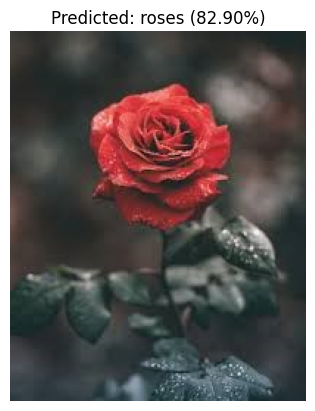

In [77]:
predicted_class = class_labels[np.argmax(predictions)]
confidence = np.max(predictions)

img = cv2.imread(new_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class} ({confidence * 100:.2f}%)", fontsize=12)
plt.show()
